In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import time
import mediapipe as mp
import pickle as pk

In [2]:
# model1 = pk.load(open('action.h5', 'rb'))
# model1 = tf.keras.models.load_model('/home/hp/Documents/College/Coding/Machine Learning/sign recognition - nicholos renotte/action.h5', custom_objects = {'Keras'})
# model = pk.load(open('action_iteration2_3actions.h5', 'rb'))

UnpicklingError: invalid load key, 'H'.

## Getting keypoints using MP Holistic

In [3]:
# media pipe holistics - used to download a model and leverage a model
mp_holistics = mp.solutions.holistic
# media pipe utilities - makes it easier to actually draw keypoints on our face
mp_drawing = mp.solutions.drawing_utils

In [4]:
def mediapipe_detection(image, model):
    '''
    Steps:
    1. convert bgr to rgb for mediapipe to perform operations
    2. set to unwritables - this saves memory
    3. process the image
    4. set the image to writables again
    5. convert rbg to bgr for cv2 to display the image 
    '''
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image.flags.writeable = False
    results = model.process(image)
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    return image, results


#### ignore for now

In [5]:
from PIL import Image
img = Image.open('download.jpeg')
array_img = np.array(img, dtype='uint8')

In [6]:
# image, results = mediapipe_detection(array_img, holistic)

In [7]:
# type(image)

### drawing landmarks

In [5]:
def draw_landmarks(image, results):
    # Draw face connections
                            #image   landmarks               #connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistics.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistics.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistics.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistics.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [9]:
# mp_drawing.draw_landmarks()

In [10]:
mp_holistics.FACEMESH_TESSELATION

frozenset({(18, 17),
           (82, 38),
           (8, 9),
           (456, 248),
           (167, 2),
           (303, 271),
           (69, 104),
           (253, 450),
           (41, 42),
           (315, 16),
           (73, 74),
           (339, 373),
           (258, 385),
           (105, 63),
           (219, 48),
           (304, 272),
           (236, 217),
           (231, 22),
           (85, 84),
           (365, 367),
           (237, 218),
           (243, 112),
           (436, 427),
           (409, 410),
           (248, 456),
           (330, 266),
           (136, 135),
           (88, 95),
           (394, 430),
           (107, 108),
           (118, 117),
           (439, 438),
           (442, 443),
           (260, 466),
           (115, 48),
           (342, 276),
           (121, 128),
           (200, 421),
           (113, 124),
           (132, 137),
           (23, 230),
           (343, 357),
           (443, 444),
           (62, 78),
           (26,

In [7]:
cap = cv2.VideoCapture(0)
with mp_holistics.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        #read feed
        ret, frame = cap.read()

        #make detection
        image, results = mediapipe_detection(image=frame, model=holistic)
        #results stores different landmarks that are detected
        
        # draw landmarks
        draw_landmarks(image, results)

        #show feed
        cv2.imshow('OpenCV feed', image)

        a = cv2.waitKey(1)
        
        if (a==ord('q')):
            break
    cap.release()
    cv2.destroyAllWindows()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/hp/.local/lib/python3.10/site-packages/cv2/qt/plugins"


In [7]:
results.face_landmarks.landmark

[x: 0.46926349401474
y: 0.6022288799285889
z: -0.02757253497838974
, x: 0.4826236963272095
y: 0.5642004609107971
z: -0.03800663352012634
, x: 0.47185537219047546
y: 0.5776776075363159
z: -0.02301652543246746
, x: 0.47564369440078735
y: 0.5282634496688843
z: -0.02740819938480854
, x: 0.4849841594696045
y: 0.5530744194984436
z: -0.03900042548775673
, x: 0.48418524861335754
y: 0.5395949482917786
z: -0.03418403118848801
, x: 0.47948896884918213
y: 0.5069766044616699
z: -0.009813248179852962
, x: 0.41268259286880493
y: 0.4866863787174225
z: -0.00963854044675827
, x: 0.48093292117118835
y: 0.48184266686439514
z: -0.0010929722338914871
, x: 0.48410889506340027
y: 0.46721822023391724
z: 0.00011727346281986684
, x: 0.48867911100387573
y: 0.41297847032546997
z: 0.017002694308757782
, x: 0.46810561418533325
y: 0.6077353358268738
z: -0.02738509327173233
, x: 0.465986967086792
y: 0.6124446988105774
z: -0.0254199355840683
, x: 0.46369874477386475
y: 0.614705502986908
z: -0.022736037150025368
, x: 0.

In [9]:
print(draw_landmarks(frame, results))

None


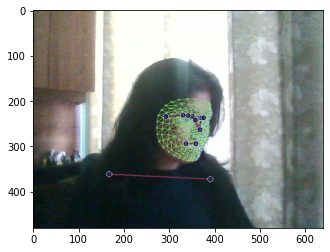

In [10]:
plt.imshow(cv2.cvtColor(frame , cv2.COLOR_BGR2RGB))

## 3. Extracting keypoints

In [62]:
results.pose_landmarks

landmark {
  x: 0.5805349349975586
  y: 0.9107149839401245
  z: -1.3077704906463623
  visibility: 0.998685359954834
}
landmark {
  x: 0.6013420820236206
  y: 0.8439521789550781
  z: -1.1826494932174683
  visibility: 0.9986454844474792
}
landmark {
  x: 0.6248570084571838
  y: 0.8416298031806946
  z: -1.1823205947875977
  visibility: 0.9983279705047607
}
landmark {
  x: 0.6467573642730713
  y: 0.8386185169219971
  z: -1.1818416118621826
  visibility: 0.9985408782958984
}
landmark {
  x: 0.5449661612510681
  y: 0.8504303693771362
  z: -1.1819860935211182
  visibility: 0.998633861541748
}
landmark {
  x: 0.5252817869186401
  y: 0.8529049158096313
  z: -1.1815623044967651
  visibility: 0.9983753561973572
}
landmark {
  x: 0.5048600435256958
  y: 0.8535038232803345
  z: -1.1812334060668945
  visibility: 0.9986388087272644
}
landmark {
  x: 0.6743761897087097
  y: 0.8593884110450745
  z: -0.5739045143127441
  visibility: 0.9986109137535095
}
landmark {
  x: 0.48913973569869995
  y: 0.8796288

In [63]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

##### Testing the above code

In [16]:
'''
The above for loop is equivalent of doing - 
'''
# results.pose_landmarks.landmark[0].x

'\nThe above for loop is equivalent of doing - \n'

In [64]:
len(results.pose_landmarks.landmark)

33

In [65]:
len(pose)

33

In [66]:
pose

[array([ 0.58053493,  0.91071498, -1.30777049,  0.99868536]),
 array([ 0.60134208,  0.84395218, -1.18264949,  0.99864548]),
 array([ 0.62485701,  0.8416298 , -1.18232059,  0.99832797]),
 array([ 0.64675736,  0.83861852, -1.18184161,  0.99854088]),
 array([ 0.54496616,  0.85043037, -1.18198609,  0.99863386]),
 array([ 0.52528179,  0.85290492, -1.1815623 ,  0.99837536]),
 array([ 0.50486004,  0.85350382, -1.18123341,  0.99863881]),
 array([ 0.67437619,  0.85938841, -0.57390451,  0.99861091]),
 array([ 0.48913974,  0.87962884, -0.57396233,  0.99881852]),
 array([ 0.63395715,  0.98441809, -1.08122051,  0.99576765]),
 array([ 0.54987478,  0.98310262, -1.08235168,  0.99678612]),
 array([ 0.81475592,  1.09459651, -0.43072969,  0.90006703]),
 array([ 0.35923761,  1.27391195, -0.46668997,  0.87202686]),
 array([ 1.08479548,  1.32328439, -1.29633248,  0.73265237]),
 array([ 0.18450508,  1.39443779, -1.23872149,  0.63050801]),
 array([ 0.94386071,  0.85401684, -1.93524718,  0.70523047]),
 array([

In [67]:
results.left_hand_landmarks

landmark {
  x: 0.993393063545227
  y: 0.9093160033226013
  z: -2.741493005942175e-07
}
landmark {
  x: 0.8971947431564331
  y: 0.910536527633667
  z: -0.022279726341366768
}
landmark {
  x: 0.817532479763031
  y: 0.8318890333175659
  z: -0.02780594862997532
}
landmark {
  x: 0.7653485536575317
  y: 0.7394771575927734
  z: -0.026203040033578873
}
landmark {
  x: 0.7264704704284668
  y: 0.6593718528747559
  z: -0.019600266590714455
}
landmark {
  x: 0.8618757128715515
  y: 0.6908400654792786
  z: -0.01247053500264883
}
landmark {
  x: 0.8214567303657532
  y: 0.5618948340415955
  z: 4.6644436224596575e-05
}
landmark {
  x: 0.7998318672180176
  y: 0.5316641926765442
  z: 0.014211505651473999
}
landmark {
  x: 0.7853571772575378
  y: 0.5296828150749207
  z: 0.0275542214512825
}
landmark {
  x: 0.9225714802742004
  y: 0.667117178440094
  z: 0.0070830234326422215
}
landmark {
  x: 0.8759865164756775
  y: 0.5495205521583557
  z: 0.029929403215646744
}
landmark {
  x: 0.8428502678871155
  y: 0

In [68]:
results.face_landmarks.landmark

[x: 0.5785012245178223
y: 0.9499076008796692
z: -0.03693816810846329
, x: 0.5806336402893066
y: 0.9001753330230713
z: -0.05490770936012268
, x: 0.5798418521881104
y: 0.9172908663749695
z: -0.03225835785269737
, x: 0.5718067288398743
y: 0.8543813228607178
z: -0.035902924835681915
, x: 0.5809920430183411
y: 0.8849928379058838
z: -0.05693908780813217
, x: 0.5811338424682617
y: 0.8665716648101807
z: -0.05077160522341728
, x: 0.5809809565544128
y: 0.8233737349510193
z: -0.016665710136294365
, x: 0.5046422481536865
y: 0.8252874612808228
z: 0.022286737337708473
, x: 0.5813404321670532
y: 0.7848557829856873
z: -0.0047530317679047585
, x: 0.5816641449928284
y: 0.7641262412071228
z: -0.0037064990028738976
, x: 0.581957221031189
y: 0.6993046402931213
z: 0.017084909602999687
, x: 0.5782474875450134
y: 0.957253098487854
z: -0.036071453243494034
, x: 0.5779268145561218
y: 0.9635912179946899
z: -0.03312402218580246
, x: 0.577731192111969
y: 0.9668815732002258
z: -0.029092615470290184
, x: 0.577615976

In [69]:
len(results.face_landmarks.landmark)

468

##### Alternate way of doing what we did in the for loop above

In [11]:
def extract_keypoints(results):
    pose = np.array([[res.x , res.y, res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    return np.concatenate([pose, face, lh, rh])

In [12]:
len(extract_keypoints(results))

1662

In [12]:
33*4 + 21*3*2 + 468*3

1662

## 4. Setup Folders for Collection

In [13]:
# path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data')

# actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# thirty videos worth of data
no_sequences = 30

# each video will be 30 frames in length
sequence_length = 30

In [73]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

'''
What we're essentially doing here is creating sub-directories for each of the action sequence.
The structure would look something like -

# MP_Data
## hello
### 0 (this has 30 frames worth of data- its essentially one single video)
### 1

so every video gets its own folder.

We use to try and except so our folder structure remains clean.
What that piece of code essentially does is checks if the folder already exisits for a particular action, then it will just pass. so we dont have redundant folders in our data
'''

"\nWhat we're essentially doing here is creating sub-directories for each of the action sequence.\nThe structure would look something like -\n\n# MP_Data\n## hello\n### 0 (this has 30 frames worth of data- its essentially one single video)\n### 1\n\nso every video gets its own folder.\n\nWe use to try and except so our folder structure remains clean.\nWhat that piece of code essentially does is checks if the folder already exisits for a particular action, then it will just pass. so we dont have redundant folders in our data\n"

## 5. Collecting keypoint values for Training and testing

In [31]:
cap = cv2.VideoCapture(0)

#setting up mediapipe model
with mp_holistics.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
# with mp.holistics.Holistic(min_detection_confidence = 0.5, min_tracking_confidence = 0.5) as holistic:
    
    # loop through actions
    for action in actions:
        # loop through sequences aka videos
        for sequence in range(no_sequences):
            #loop through video length aka sequence length
            for frame_num in range(sequence_length):

                #read feed
                ret, frame = cap.read()

                #make detection
                image, results = mediapipe_detection(frame, holistic)
                print(results)

                #draw landmarks
                draw_landmarks(image, results)

                #apply wait logic so we have time in between frames
                if frame_num == 0:
                    cv2.putText(image, 'Starting Collection', (120,200), cv2.FONT_HERSHEY_SIMPLEX,  1, (0,225,0), 4, cv2.LINE_AA)

                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence),(15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1 ,cv2.LINE_AA)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence),(15, 12), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,0,255), 1 ,cv2.LINE_AA)
                
                # export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                #show to screen
                cv2.imshow('Data Collection', image)
                a = cv2.waitKey(1)
        
                if (a==ord('q')):
                    break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

[cv2.putText](https://www.geeksforgeeks.org/python-opencv-cv2-puttext-method/)

## 6. Preprocess Data and Create Labels and Features

In [14]:
from sklearn.model_selection import train_test_split 
from tensorflow.keras.utils import to_categorical

2023-03-30 11:06:07.361104: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-30 11:06:10.377518: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/hp/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-03-30 11:06:10.377573: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-30 11:06:18.662545: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: 

In [15]:
label_map = {label:num for num, label in enumerate(actions)}

In [18]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [77]:
action

'iloveyou'

In [16]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), '{}.npy'.format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [20]:
np.array(window).shape

(30, 1662)

In [21]:
np.array(sequences).shape       #90 videos with 30 frames each, each frame containing 1662 different keypoints

(90, 30, 1662)

In [22]:
np.array(labels).shape

(90,)

In [17]:
X = np.array(sequences)
X.shape

(90, 30, 1662)

In [18]:
y = to_categorical(labels).astype(int)      #one hot encoded the y variable
y.shape

(90, 3)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
len(X_train), len(X_test), len(y_train), len(y_test)

(63, 27, 63, 27)

In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((63, 30, 1662), (27, 30, 1662), (63, 3), (27, 3))

## 7. Build and Train LSTM Neural Network

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.models import load_model, save_model


In [23]:
# setup log directory and tensorboard callback
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [30]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

2023-03-30 01:05:04.734868: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/hp/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-03-30 01:05:04.743479: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-30 01:05:04.743590: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (nidhi): /proc/driver/nvidia/version does not exist
2023-03-30 01:05:04.810701: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [31]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [32]:
model.fit(X_train, y_train, epochs=1000, callbacks=[tb_callback])

Epoch 1/1000
2/2 [==============================] - 13s 167ms/step - loss: 2.2148 - categorical_accuracy: 0.3519
Epoch 2/1000
2/2 [==============================] - 0s 147ms/step - loss: 26.0417 - categorical_accuracy: 0.3333
Epoch 3/1000
2/2 [==============================] - 0s 161ms/step - loss: 5.3109 - categorical_accuracy: 0.4259
Epoch 4/1000
2/2 [==============================] - 0s 167ms/step - loss: 4.4342 - categorical_accuracy: 0.5185
Epoch 5/1000
2/2 [==============================] - 0s 149ms/step - loss: 7.6148 - categorical_accuracy: 0.2963
Epoch 6/1000
2/2 [==============================] - 0s 156ms/step - loss: 73.9807 - categorical_accuracy: 0.4259
Epoch 7/1000
2/2 [==============================] - 0s 180ms/step - loss: 56.3801 - categorical_accuracy: 0.2593
Epoch 8/1000
2/2 [==============================] - 0s 154ms/step - loss: 28.2604 - categorical_accuracy: 0.3519
Epoch 9/1000
2/2 [==============================] - 0s 92ms/step - loss: 9.2687 - categorical_accur

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

## 8. Make Predictions

In [29]:
res = model.predict(X_test)

1/1 [==============================] - 3s 3s/step


In [30]:
actions[np.argmax(res[4])]

'thanks'

In [115]:
actions[np.argmax(y_test[4])]

'thanks'

## 9. Save Weights


In [36]:
# model.save('action_iteration1_3actions.h5')
pk.dump(model, open('action_iteration2_3actions.h5', 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_1
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_2
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........23
.........24
.........25
.........26
.........27
.........28
.........29
....

In [57]:
# model.load_weights('action_iteration1_3actions.h5')
model = pk.load(open('action_iteration2_3actions.h5', 'rb'))

Keras model archive loading:
File Name                                             Modified             Size
metadata.json                                  2023-03-30 01:09:36           64
config.json                                    2023-03-30 01:09:36         4348
variables.h5                                   2023-03-30 01:09:36      7205360
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......lstm
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_1
.........cell
............vars
...............0
...............1
...............2
.........vars
......lstm_2
.........cell
............vars
...............0
...............1
...............2
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wr

In [59]:
actions = np.array(['hello', 'thanks', 'iloveyou'])

In [61]:
model = load_model('action.h5')

## 10. Evaluation

In [35]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [31]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 93ms/step


In [32]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [33]:
ytrue

[2,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 0,
 2,
 1,
 2,
 0,
 1,
 1,
 2,
 1,
 0,
 2,
 2,
 2,
 0]

In [36]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[21,  0],
        [ 6,  0]],

       [[ 0, 17],
        [ 0, 10]],

       [[16,  0],
        [11,  0]]])

In [37]:
accuracy_score(ytrue, yhat)

0.37037037037037035

In [38]:
res

array([[6.3005049e-05, 9.9927241e-01, 6.6461315e-04],
       [1.3542378e-04, 9.9878097e-01, 1.0836035e-03],
       [1.0988354e-04, 9.9925005e-01, 6.4004556e-04],
       [8.6342676e-05, 9.9921125e-01, 7.0239458e-04],
       [6.0754515e-05, 9.9935222e-01, 5.8696436e-04],
       [5.1029139e-05, 9.9949855e-01, 4.5053309e-04],
       [8.9543217e-05, 9.9918598e-01, 7.2442938e-04],
       [7.6007193e-05, 9.9932450e-01, 5.9942942e-04],
       [8.5989501e-05, 9.9917150e-01, 7.4250950e-04],
       [1.6828137e-04, 9.9849582e-01, 1.3359049e-03],
       [6.5369008e-05, 9.9937785e-01, 5.5675092e-04],
       [6.7914109e-05, 9.9936545e-01, 5.6655228e-04],
       [1.1604565e-04, 9.9898803e-01, 8.9595816e-04],
       [1.9065544e-04, 9.9861592e-01, 1.1934093e-03],
       [4.5410954e-05, 9.9949330e-01, 4.6121477e-04],
       [1.7430687e-04, 9.9847376e-01, 1.3519729e-03],
       [6.4023196e-05, 9.9926603e-01, 6.7005667e-04],
       [1.9514987e-04, 9.9849391e-01, 1.3108536e-03],
       [1.2404214e-04, 9.987

## 11. Test in Real Time

In [41]:
threshold = 0.4

In [62]:
def prob_viz(res, actions, input_frame):
    colors = [(245,117,16), (117,245,16), (16,117,245)]
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [64]:
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistics.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [45]:
res[np.argmax(res)]

array([6.4023196e-05, 9.9926603e-01, 6.7005667e-04], dtype=float32)

In [51]:
cap.release()
cv2.destroyAllWindows()